In [ ]:
# To run:
# $ jupyter notebook

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import property_and_mortgage as pm
import display_utils as du

# Plot the figures inline and not in a pop-up
%matplotlib inline

In [62]:
# Mortgage-related parameters:
principal_loan_amount_ = 500000.00
annual_interest_rate_ = 0.0525
mortgage_term_in_years_ = 30.0
loan_down_payment_ = 100000.0

# Property-related parameters:
initial_property_value_ = 600000.0
annual_appreciation_rate_ = 0.02

# Instantiate the mortgage and property classes.
mortgage_ = pm.mortgage(principal_loan_amount_, annual_interest_rate_,
                        mortgage_term_in_years_)
investment_property_ = pm.investment_property(
    mortgage_, initial_property_value_, annual_appreciation_rate_)


########## 0. One-time costs
one_time_costs = {
    'Down payment':  loan_down_payment_,
    'Closing costs':            3000.00,
    'Rehab budget':            10000.00,
    'Miscellaneous':               0.00
}

########## 1. Monthly Income
monthly_income = {
    'Rent':  5500.00,
    'Other':    5.00
}

########## 2. Annual Expenses
annual_expenses = {
    'Property tax':       2600.00,
    'Property insurance': 1000.00,
    'HOA':                1000.00,
    'Mortgage insurance': 1000.00
}

########## 2. Monthly Expenses
monthly_expenses = {
    'Utilies':   0.0,
    'Lawn care': 0.0,
    'Mortgage':  mortgage_.get_monthly_payment()
}

########## 2. Periodic Expenses: Capital Expenditures
# The format is ('name', period in years, dollar amount)
capital_expenditures = {
    ('Roof',         30,  30000.00),
    ('Water heater', 20,   4000.00),
    ('Paint',         2,   1000.00),
    ('Floors',       15,  10000.00),
    ('Heat/AC',      15,   8000.00)
}

########## 2. Expenses Proportional to Rent
proportional_expenses = {
    'Vacancy':             0.05,
    'Property management': 0.10
}

In [63]:
def sort(names, values):
    vals = [list(x) for x in
            zip(*sorted(zip(values, names), key=lambda pair: pair[0]))]
    return vals[1], vals[0]

In [64]:
def calculate_total_expenses(annual_expenses, monthly_expenses,
                             proportional_expenses, capital_expenditures):
    total_expense_names = []
    total_expense_values = []

    for e in annual_expenses:
        if annual_expenses[e] == 0: continue
        total_expense_names.append(e)
        total_expense_values.append(annual_expenses[e] / 12.0)
    for e in monthly_expenses:
        if monthly_expenses[e] == 0: continue
        total_expense_names.append(e)
        total_expense_values.append(monthly_expenses[e])
    for e in proportional_expenses:
        if proportional_expenses[e] == 0: continue
        total_expense_names.append(e)
        total_expense_values.append(
            proportional_expenses[e] * monthly_income['Rent'])
    total_expense_names.append('Capital expenditures')
    total_expense_values.append(
        np.sum([e[2] / (12.0 * float(e[1])) for e in capital_expenditures]))

    # Return the sorted expense names and values.
    return sort(total_expense_names, total_expense_values)

In [65]:
def calculate_total_capital_expenditures(cap_exp):
    total_cap_ex_names = []
    total_cap_ex_values = []
    for e in cap_exp:
        if e[2] == 0: continue
        total_cap_ex_names.append(e[0])
        total_cap_ex_values.append(e[2] / (12.0 * float(e[1])))
    # Return the sorted cap ex names and values.
    return sort(total_cap_ex_names, total_cap_ex_values)


Total monthly expenses: $4321.54


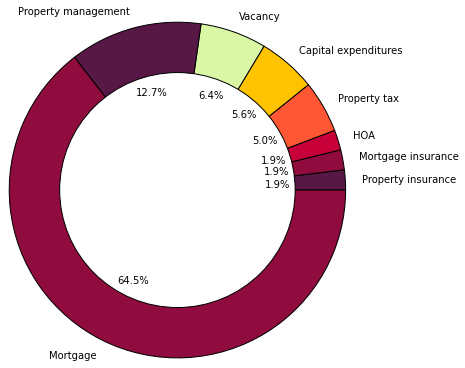


Total monthly capital expenditures: $241.67


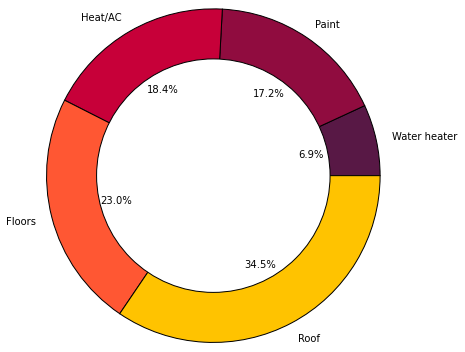

In [66]:
# 2. Total Monthly Expenses
total_expense_names = []
total_expense_values = []

# TODO(harda) factor in one-time expenses
#total_expense_names.append('One-time expenses')
for e in one_time_costs:
    if one_time_costs[e] == 0: continue
    total_expense_names.append(e)
    total_expense_values.append(
        one_time_costs[e] / (12.0 * mortgage_term_in_years_))

total_expense_names, total_expense_values = calculate_total_expenses(
    annual_expenses, monthly_expenses, proportional_expenses,
    capital_expenditures)
total_cap_ex_names, total_cap_ex_values = calculate_total_capital_expenditures(
    capital_expenditures)

# Plot a pie chart of expenses
print(str('\nTotal monthly expenses: $%2.2f' % np.sum(total_expense_values)))
du.plot_pie(total_expense_names, total_expense_values)

# Plot a pie chart of capital expenditures
print(str('\nTotal monthly capital expenditures: $%2.2f' %
          np.sum(total_cap_ex_values)))
du.plot_pie(total_cap_ex_names, total_cap_ex_values)

In [67]:
monthly_total_income = np.sum([monthly_income[e] for e in monthly_income])
monthly_total_expenses = np.sum(total_expense_values)

# 3. Cash Flow
monthly_cash_flow = monthly_total_income - monthly_total_expenses
annual_cash_flow = monthly_cash_flow * 12.0
print('Monthly total cashflow = $%2.2f' % monthly_cash_flow)
print('Annual total cashflow = $%2.2f' % annual_cash_flow)

# 4. Cash on Cash RoI
total_investment = np.sum([one_time_costs[e] for e in one_time_costs])
print('\nTotal investment = $%2.2f' % total_investment)

annual_roi = annual_cash_flow / total_investment
print('\nAnnual RoI = %2.2f%%' % (100.0 * annual_roi))


Monthly total cashflow = $1183.46
Annual total cashflow = $14201.53

Total investment = $113000.00

Annual RoI = 12.57%
